<a href="https://colab.research.google.com/github/disha2sinha/CropYield-prediction/blob/master/CropPrediction(Bellary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset(Bangalore rural District)

In [0]:
from google.colab import files
uploaded=files.upload()

In [0]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(uploaded['bellary.csv']))
df.rename(columns={'vapour_pressure area':'vapour_pressure','Unnamed: 6':'area'},inplace=True)
df

### Showing correlation between dependent and independent variables

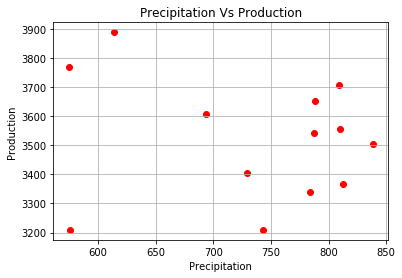

In [0]:
plt.scatter(df['percipitation'],df['production'],color='red')
plt.title("Precipitation Vs Production")
plt.xlabel("Precipitation")
plt.ylabel("Production")
plt.grid()
plt.show()

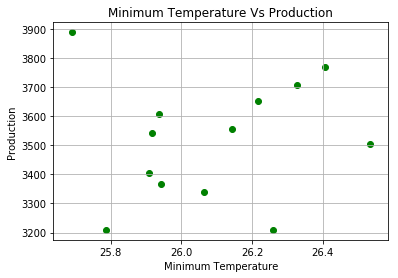

In [0]:
plt.scatter(df['min_temp'],df['production'],color='green')
plt.title("Minimum Temperature Vs Production")
plt.xlabel("Minimum Temperature")
plt.ylabel("Production")
plt.grid()
plt.show()

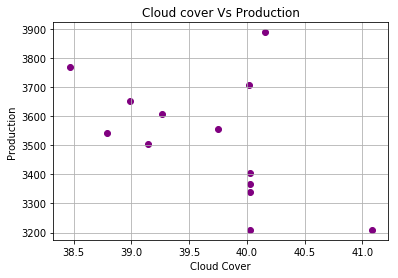

In [0]:
plt.scatter(df['cloud_cover'],df['production'],color="purple")
plt.title("Cloud cover Vs Production")
plt.xlabel("Cloud Cover")
plt.ylabel("Production")
plt.grid()
plt.show()

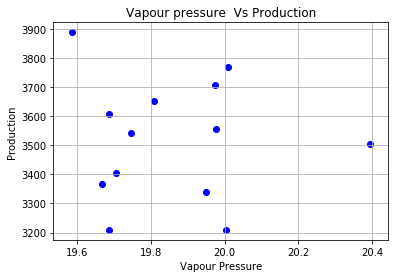

In [0]:
plt.scatter(df['vapour_pressure'],df['production'],color='blue')
plt.title("Vapour pressure  Vs Production")
plt.xlabel("Vapour Pressure")
plt.ylabel("Production")
plt.grid()
plt.show()

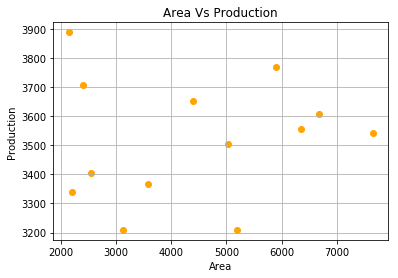

In [0]:
plt.scatter(df['area'],df['production'],color='orange')
plt.title("Area Vs Production")
plt.xlabel("Area")
plt.ylabel("Production")
plt.grid()
plt.show()

## Regression :

In [0]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [0]:

X = df[['percipitation'	,'min_temp'	,'cloud_cover'	,'vapour_pressure'	,'area']] 
Y = df['production']
 
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=1)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
  



# prediction
y_pred=reg.predict(x_test)
print('Predicted Production:',y_pred,'\n')

# Coefficients
print('\nCoefficients: ', reg.coef_,'\n')

# R-squared score
print('\nR-squared score: ', r2_score(y_test,y_pred),'\n')

Predicted Production: [3610.00623229 3674.33742422 3638.6165311 ] 


Coefficients:  [-3.23473991e-01  6.84019918e+01 -1.90275007e+02 -3.90850712e+02
 -5.28011907e-02] 


R-squared score:  -13.544803796521709 



**ROW-wise Regression**

In [0]:
predicted_production=[]
actual_production=[]
errors=[]
for i in df.index.values:
  A_test=df.iloc[df.index==i].drop(['production'],axis=1)
  b_test=df.iloc[df.index==i]['production']
  A_train=df.drop(['production'],axis=1).drop([i],axis=0)
  b_train=df.drop([i])['production']
  reg=linear_model.LinearRegression()
  reg.fit(A_train,b_train)
  # prediction
  b_pred=reg.predict(A_test)
  actual_production.append(b_test.get_values()[0])
  predicted_production.append(b_pred[0])
  
for i in range(len(predicted_production)):
  errors.append(actual_production[i]-predicted_production[i])

year=1990
for i in range(len(predicted_production)):
  print('Year: ',year,'- Actual production: ',[actual_production[i]],', Predicted production: ',[predicted_production[i]],', Error: ',[errors[i]])
  year+=1

Year:  1990 - Actual production:  [3889] , Predicted production:  [3195.8698135528066] , Error:  [693.1301864471934]
Year:  1991 - Actual production:  [3339] , Predicted production:  [3591.783213663439] , Error:  [-252.7832136634388]
Year:  1992 - Actual production:  [3368] , Predicted production:  [3696.4621154976776] , Error:  [-328.4621154976776]
Year:  1993 - Actual production:  [3406] , Predicted production:  [3491.607769037131] , Error:  [-85.60776903713122]
Year:  1994 - Actual production:  [3210] , Predicted production:  [3438.658610970044] , Error:  [-228.6586109700438]
Year:  1995 - Actual production:  [3708] , Predicted production:  [3190.5276448995282] , Error:  [517.4723551004718]
Year:  1996 - Actual production:  [3555] , Predicted production:  [3453.2623727863247] , Error:  [101.7376272136753]
Year:  1997 - Actual production:  [3654] , Predicted production:  [3676.2957025172072] , Error:  [-22.295702517207246]
Year:  1998 - Actual production:  [3504] , Predicted producti

**Calculating RMS error**

In [0]:
import math
sum_error=0
for i in range(len(predicted_production)):
  diff=actual_production[i]-predicted_production[i]
  pow_diff=math.pow(diff,2)
  sum_error=sum_error+pow_diff
root_error=math.sqrt(sum_error)
rms_error=root_error/len(predicted_production)
print('\nRoot Mean Square error: ',rms_error,'\n')


RMS error:  96.60566696492407 

